## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pip install mysql-connector-python

In [4]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="ml_project"
)

# Load Train Data
train_query = "SELECT * FROM train_data"
train_data = pd.read_sql(train_query, conn)

# Load Test Data
test_query = "SELECT * FROM test_data"
test_data = pd.read_sql(test_query, conn)

conn.close()

# Drop the 'id' column as it's not useful for training
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])


In [5]:
train_data.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8090,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.140
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270


In [6]:
test_data.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,Snack Foods,107.8620,OUT049,1999,Medium,Tier 1,Supermarket Type1\r
1,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,,Tier 2,Supermarket Type1\r
2,14.60,Low Fat,0.099575,Others,241.7540,OUT010,1998,,Tier 3,Grocery Store\r


In [7]:
train_data.shape , test_data.shape

((8523, 11), (5681, 10))

In [8]:
train_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [10]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992778,1997.831867,2181.288955
std,6.431899,0.051598,62.275063,8.371760,1706.499647
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247500
50%,11.000000,0.053931,143.013000,1999.000000,1794.330000
75%,16.000000,0.094585,185.644000,2004.000000,3101.300000
max,21.350000,0.328391,266.888000,2009.000000,13087.000000


In [11]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,10.514514,0.065684,141.023273,1997.828903
std,6.399928,0.051252,61.809090,8.372256
min,0.000000,0.000000,31.990000,1985.000000
25%,6.550000,0.027047,94.412000,1987.000000
50%,10.500000,0.054154,141.415000,1999.000000
75%,15.850000,0.093463,186.027000,2004.000000
max,21.350000,0.323637,266.588000,2009.000000


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


## Check Duplicates 


In [13]:
print(train_data.duplicated().sum())

0


# Label Encoding Of Train_data

In [14]:
# object type of train_data
# Item_Fat_Content , Item_Type, Outlet_Size, Outlet_Location_Type,  Outlet_Type 

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
train_data.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat' , 'LF' : 'Low Fat' , 'reg' : 'Regular'}} , inplace = True)


train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [18]:
LE = LabelEncoder()

In [26]:
train_data['Item_Fat_Content'] = LE.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type'] = LE.fit_transform(train_data['Item_Type'])
train_data['Outlet_Size'] = LE.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Identifier'] = LE.fit_transform(train_data['Outlet_Identifier'])
train_data['Outlet_Location_Type'] = LE.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type'] = LE.fit_transform(train_data['Outlet_Type'])

In [25]:
train_data.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,6.865,0,0.056783,13,214.5220,1,1987,1,2,1,2778.380
8519,8.380,1,0.046982,0,108.1570,7,2002,0,1,1,549.285
8520,10.600,0,0.035186,8,85.1224,6,2004,3,1,1,1193.110
8521,7.210,1,0.145221,13,103.1330,3,2009,2,2,2,1845.600
8522,14.800,0,0.044878,14,75.4670,8,1997,3,0,1,765.670


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   object 
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


In [31]:
test_data.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat' , 'LF' : 'Low Fat' , 'reg' : 'Regular'}} , inplace = True)


test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [33]:
test_data['Item_Fat_Content'] = LE.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type'] = LE.fit_transform(test_data['Item_Type'])
test_data['Outlet_Size'] = LE.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Identifier'] = LE.fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Location_Type'] = LE.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type'] = LE.fit_transform(test_data['Outlet_Type'])

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   int64  
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 732.6 KB


In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   int32  
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   int32  
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   int32  
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   int32  
 8   Outlet_Location_Type       5681 non-null   int32  
 9   Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(6), int64(1)
memory usage: 310.8 KB


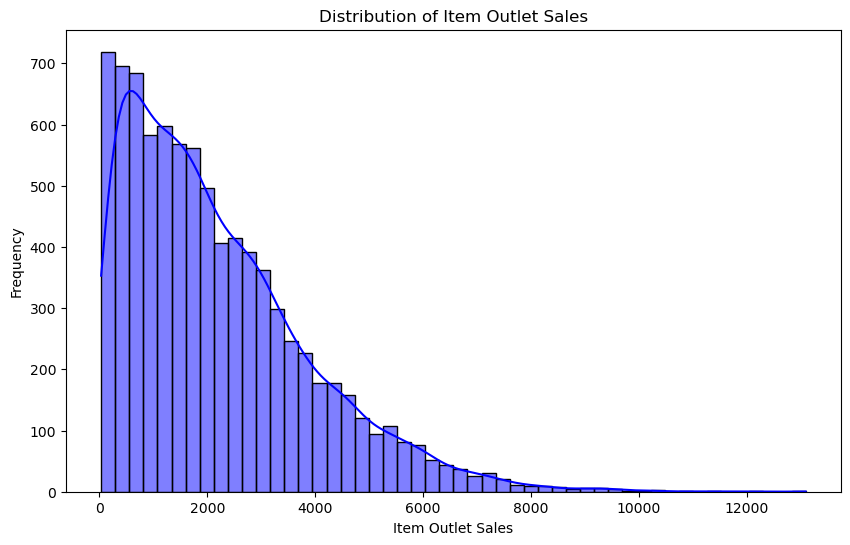

In [160]:
# Distribution of Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_Outlet_Sales'], bins=50, kde=True, color='blue')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

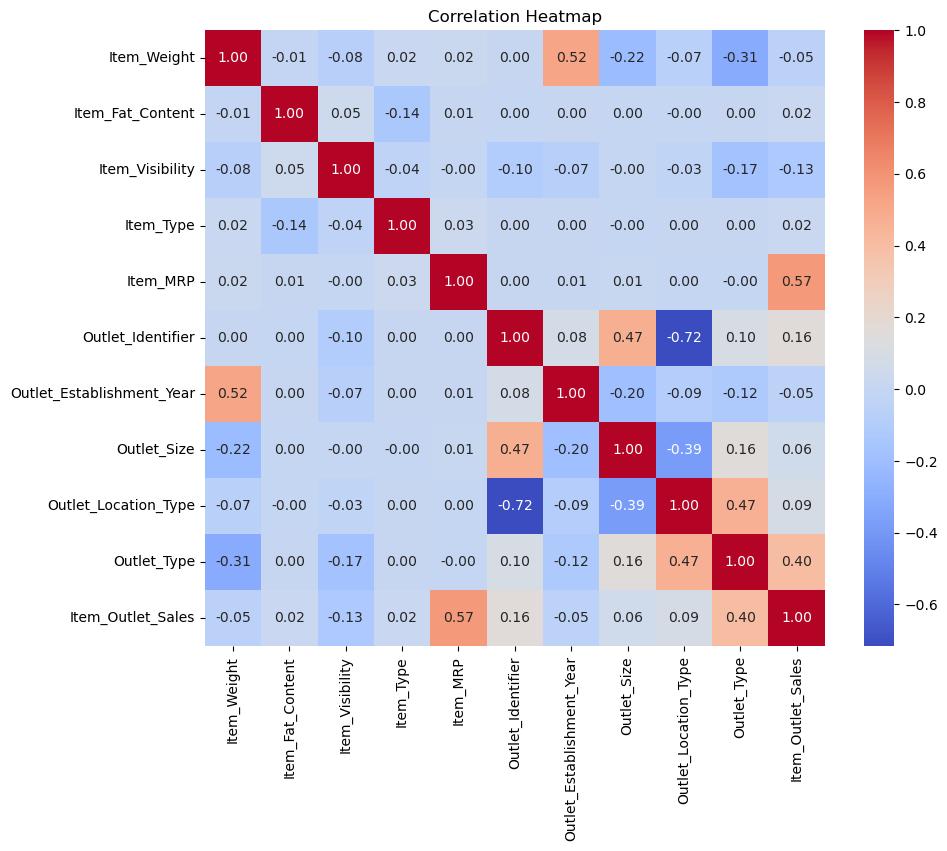

In [189]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

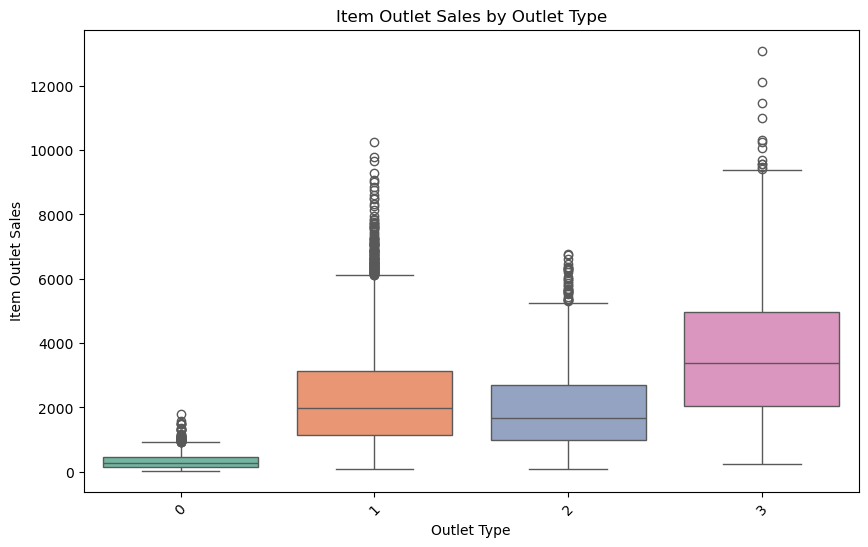

In [162]:
# Boxplot of Item Outlet Sales by Outlet Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data, palette='Set2')
plt.title('Item Outlet Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

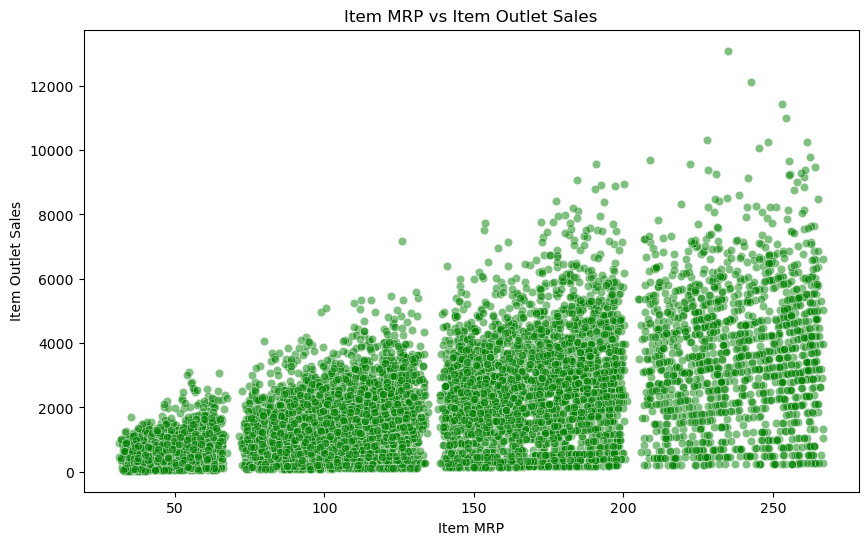

In [163]:
# Scatter Plot of Item MRP vs Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data, alpha=0.5, color='green')
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

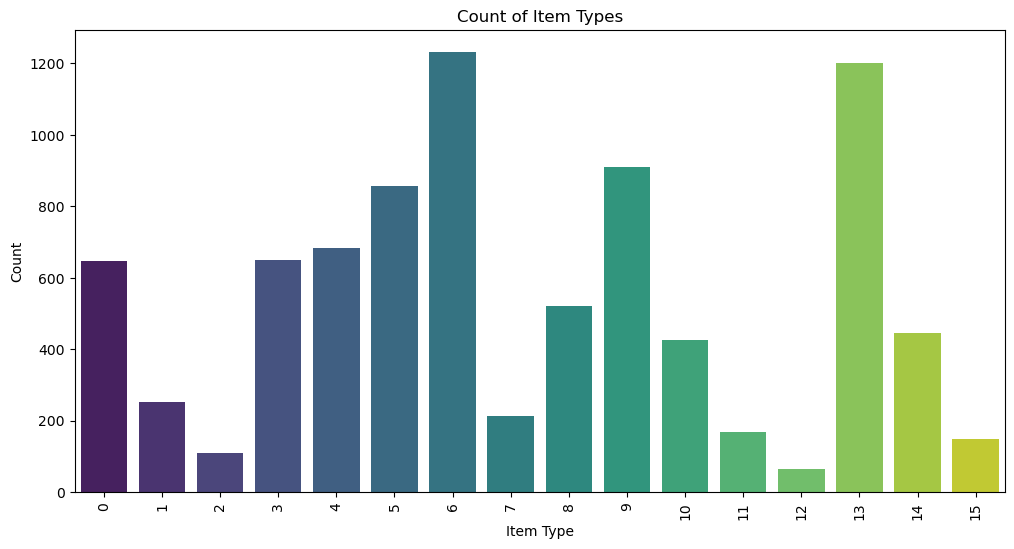

In [164]:
# Count Plot of Item Types
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=train_data, palette='viridis')
plt.title('Count of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

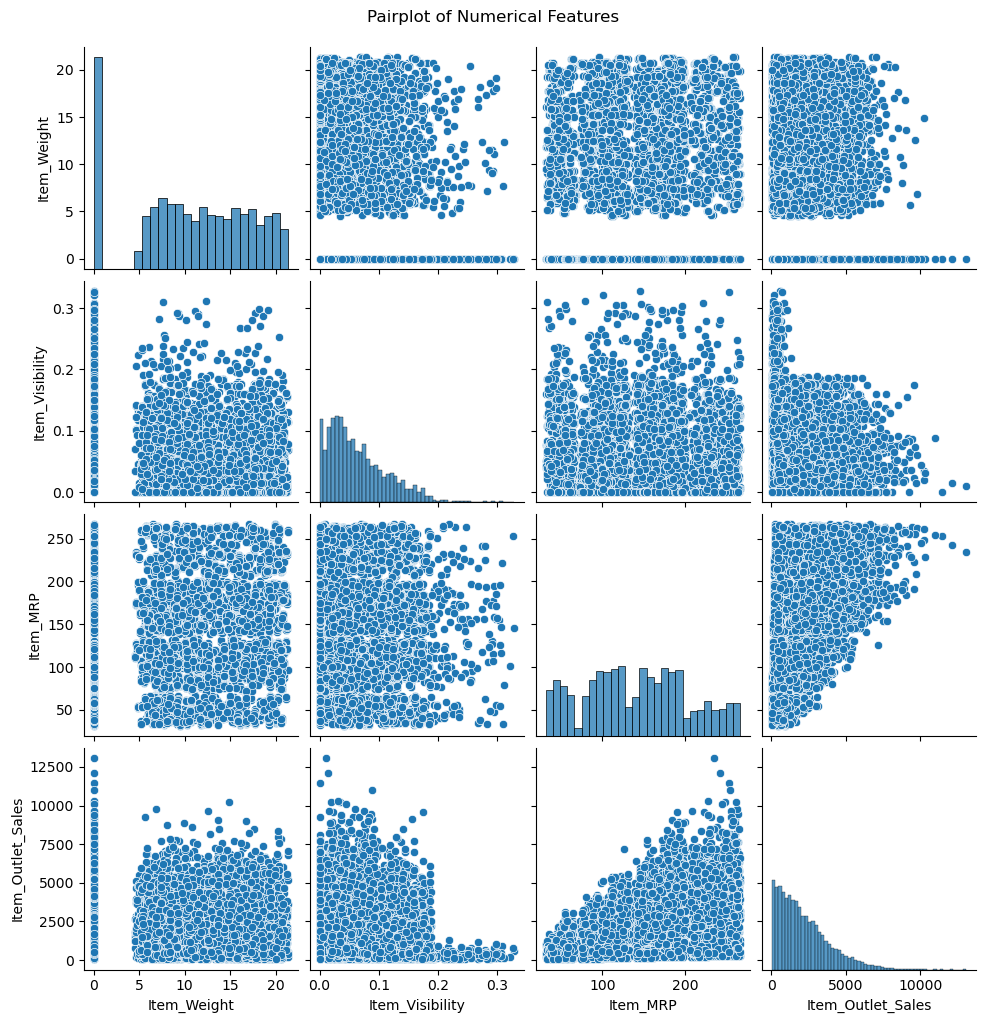

In [165]:
# Pairplot of Numerical Features
sns.pairplot(train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

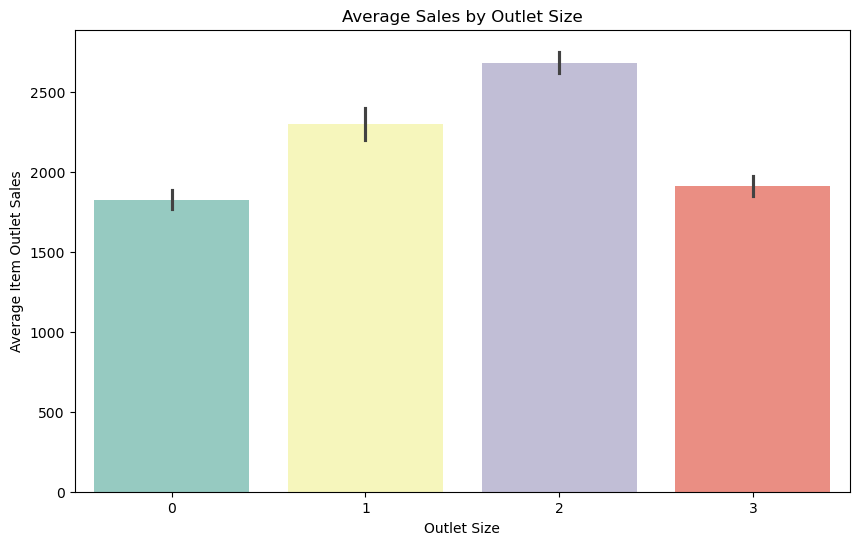

In [166]:
# Bar Plot of Average Sales by Outlet Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data, palette='Set3', estimator=np.mean)
plt.title('Average Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Average Item Outlet Sales')
plt.show()

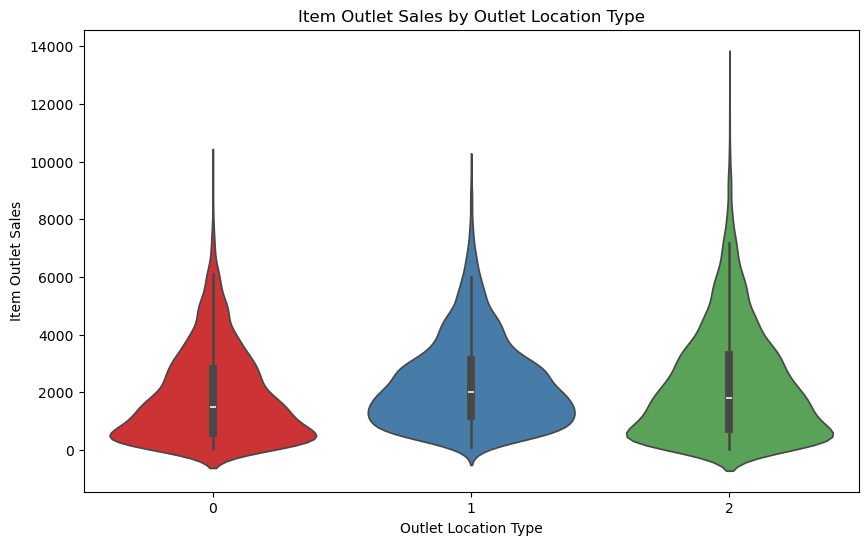

In [167]:
# Violin Plot of Item Outlet Sales by Outlet Location Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data, palette='Set1')
plt.title('Item Outlet Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

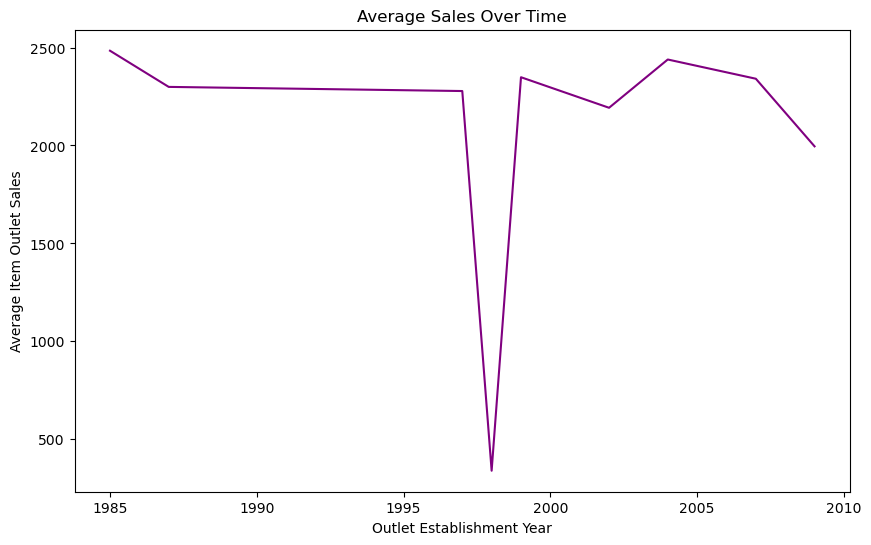

In [168]:
# Line Plot of Sales Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data, estimator=np.mean, ci=None, color='purple')
plt.title('Average Sales Over Time')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Average Item Outlet Sales')
plt.show()

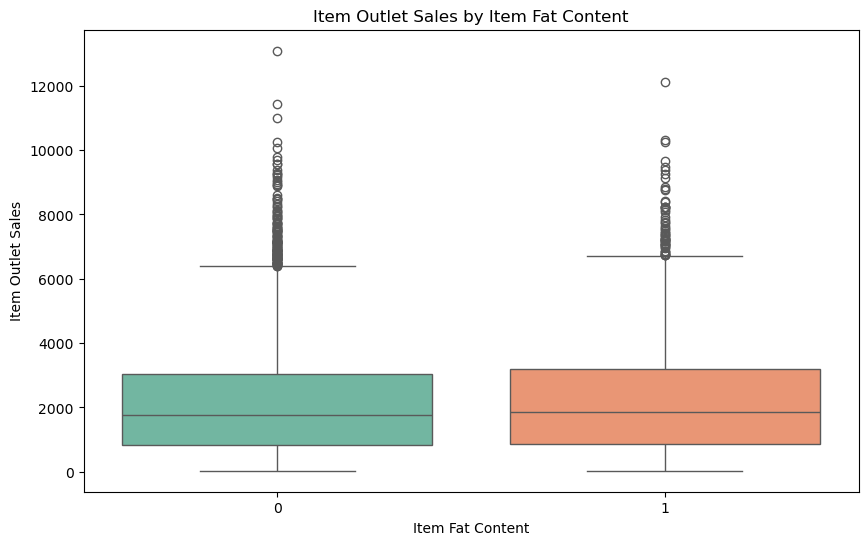

In [169]:
# Boxplot of Item Outlet Sales by Item Fat Content
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_data, palette='Set2')
plt.title('Item Outlet Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

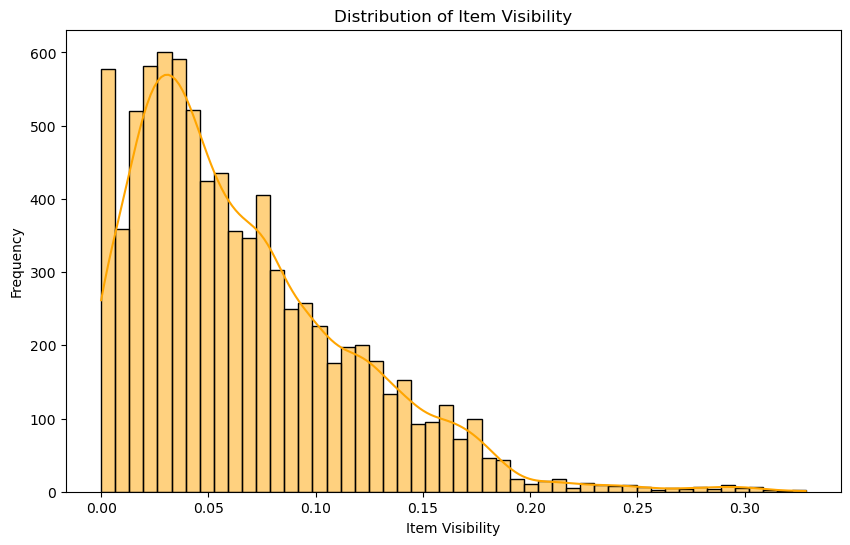

In [170]:
# Distribution of Item Visibility
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_Visibility'], bins=50, kde=True, color='orange')
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

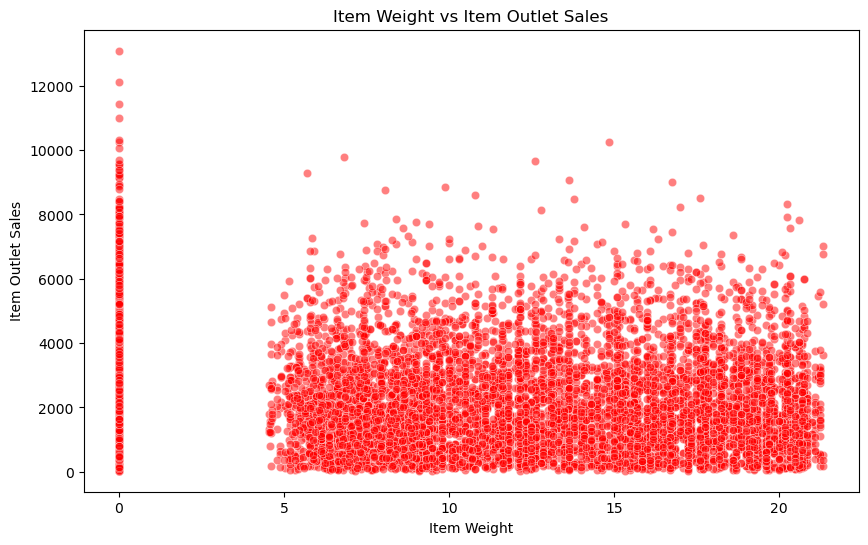

In [171]:
# Scatter Plot of Item Weight vs Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_data, alpha=0.5, color='red')
plt.title('Item Weight vs Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

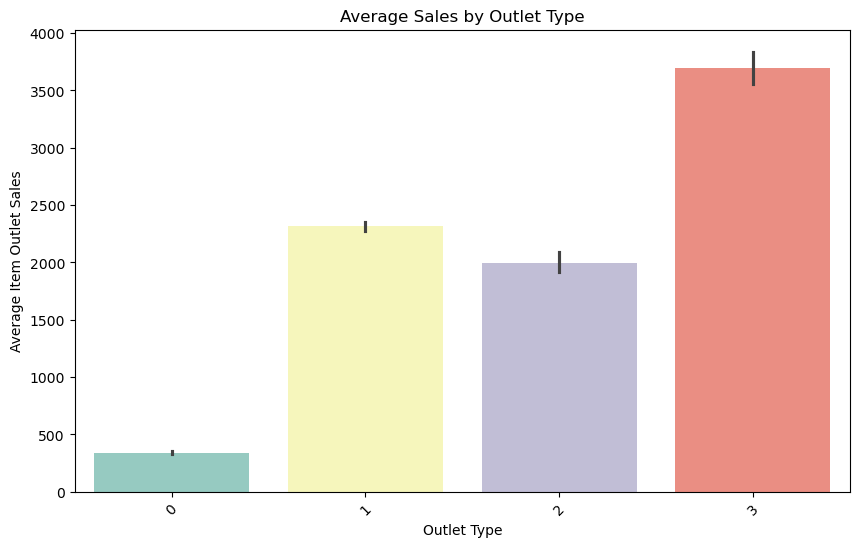

In [172]:
# Bar Plot of Average Sales by Outlet Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data, palette='Set3', estimator=np.mean)
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

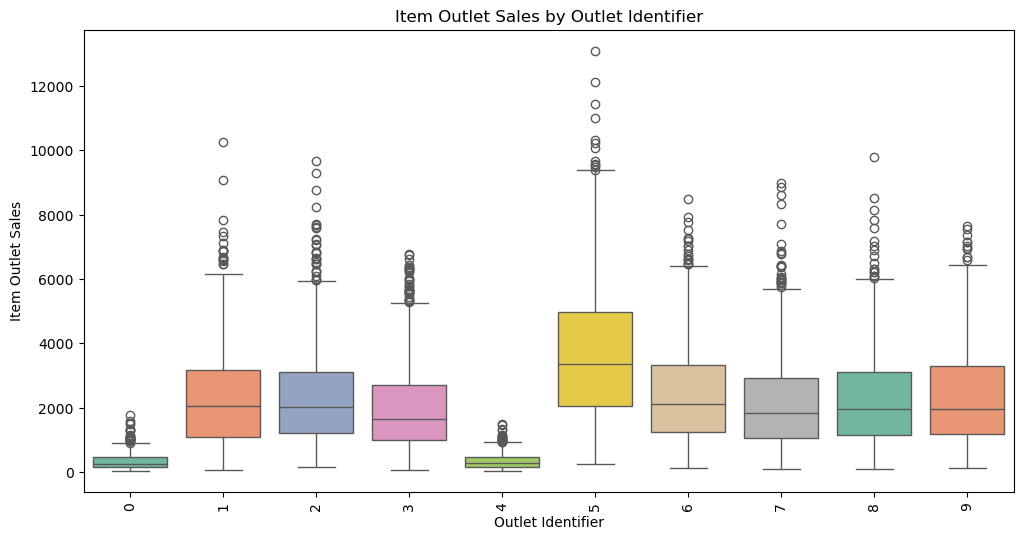

In [173]:
# Boxplot of Item Outlet Sales by Outlet Identifier
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_data, palette='Set2')
plt.title('Item Outlet Sales by Outlet Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()

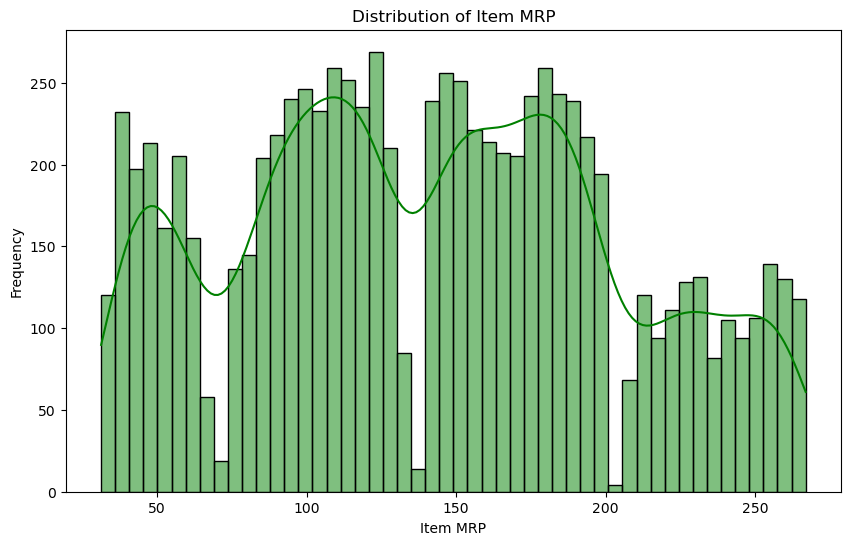

In [174]:
# Distribution of Item MRP
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_MRP'], bins=50, kde=True, color='green')
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

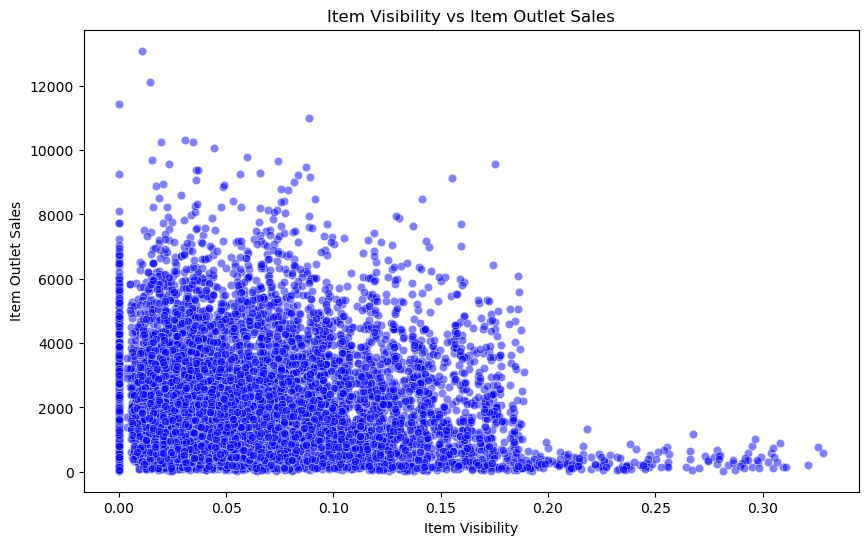

In [175]:
# Scatter Plot of Item Visibility vs Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_data, alpha=0.5, color='blue')
plt.title('Item Visibility vs Item Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

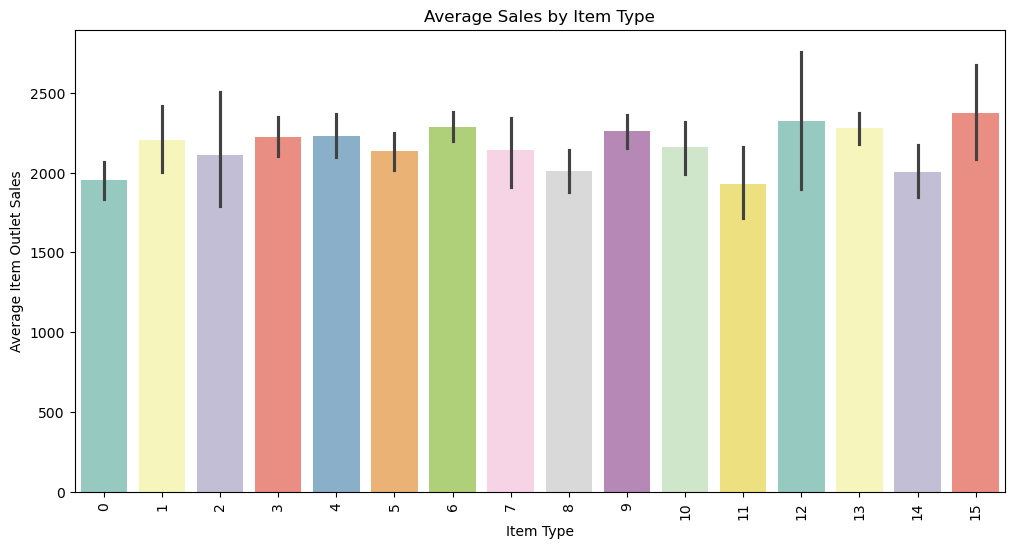

In [176]:
# Bar Plot of Average Sales by Item Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data, palette='Set3', estimator=np.mean)
plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()

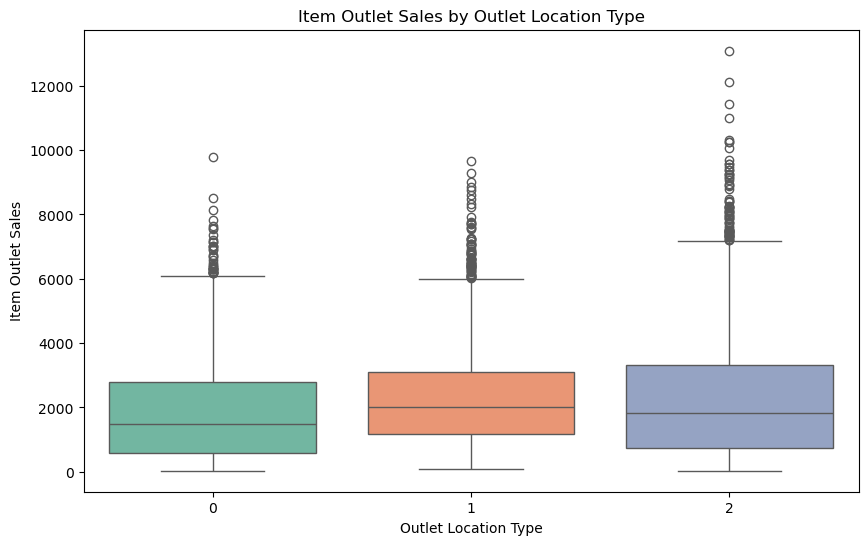

In [177]:
# Boxplot of Item Outlet Sales by Outlet Location Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data, palette='Set2')
plt.title('Item Outlet Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

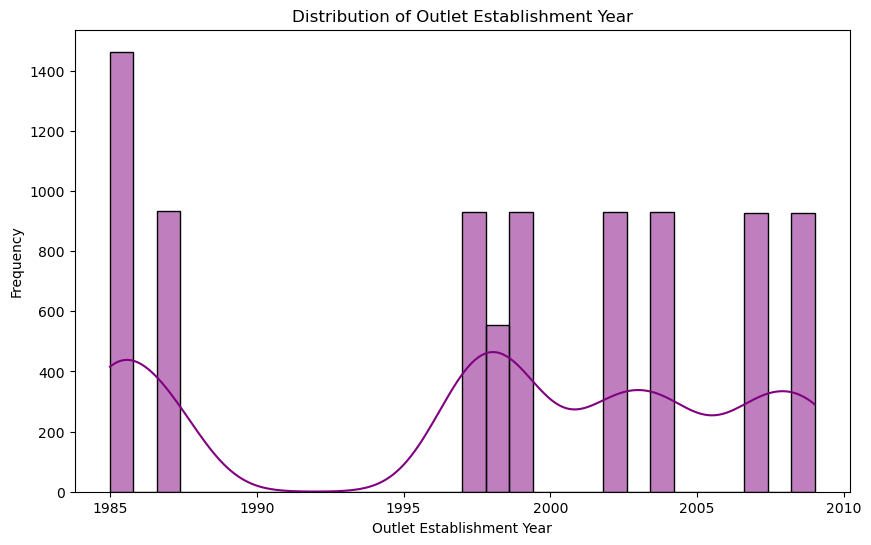

In [178]:
# Distribution of Outlet Establishment Year
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Outlet_Establishment_Year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Frequency')
plt.show()

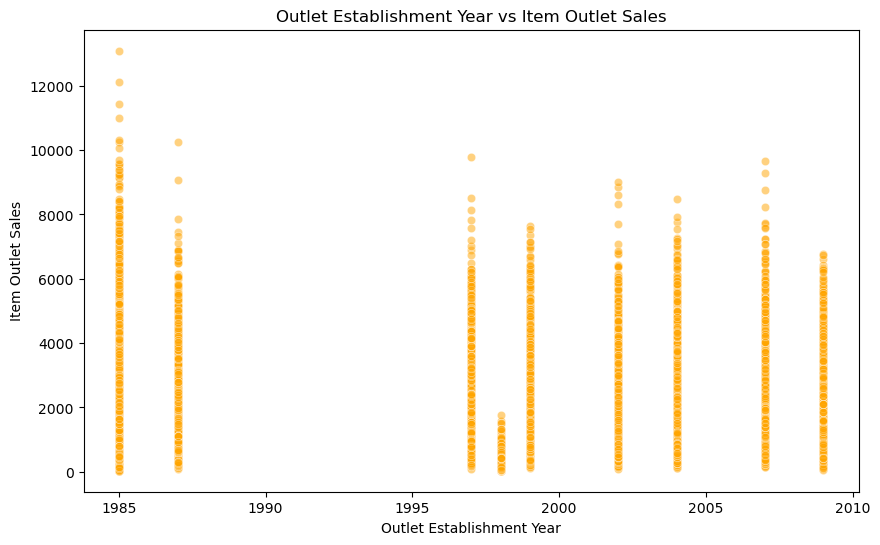

In [179]:
# Scatter Plot of Outlet Establishment Year vs Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data, alpha=0.5, color='orange')
plt.title('Outlet Establishment Year vs Item Outlet Sales')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.show()

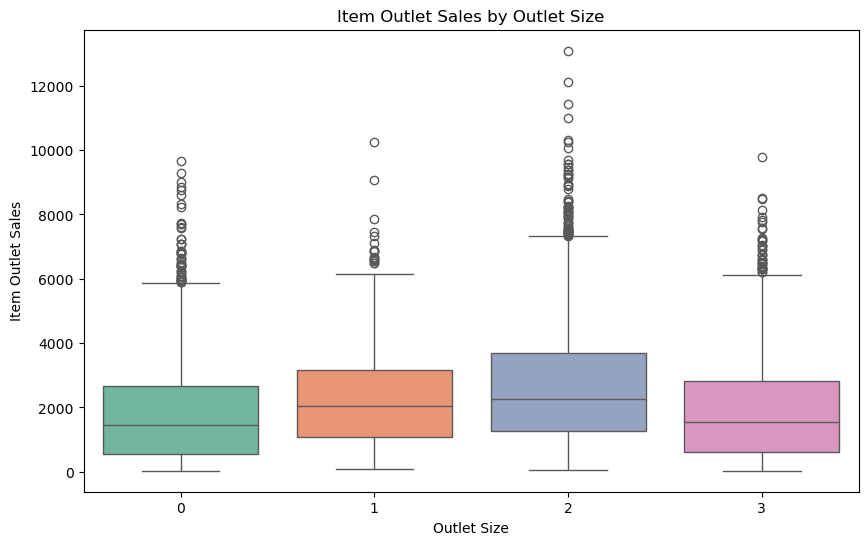

In [180]:
# Boxplot of Item Outlet Sales by Outlet Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data, palette='Set2')
plt.title('Item Outlet Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

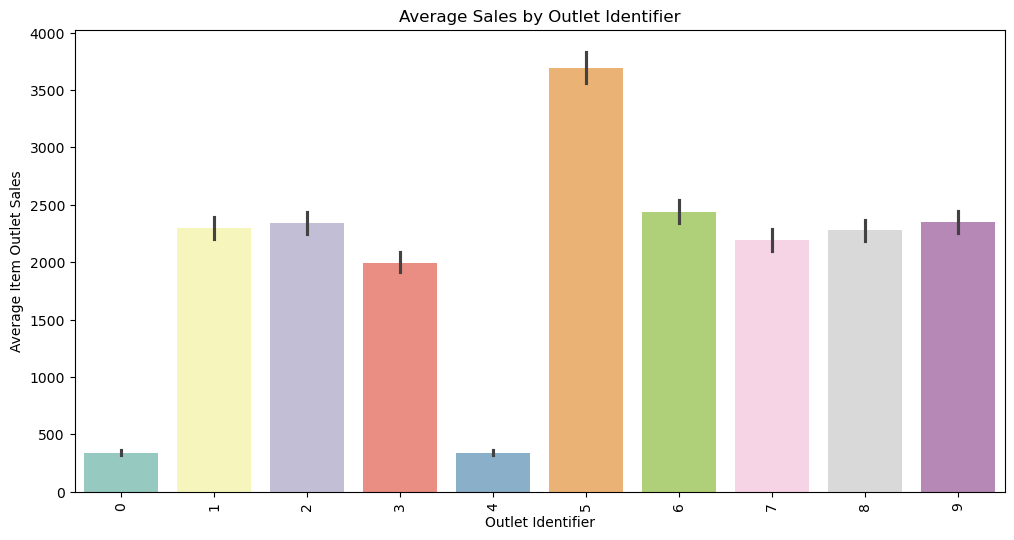

In [181]:
# Bar Plot of Average Sales by Outlet Identifier
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_data, palette='Set3', estimator=np.mean)
plt.title('Average Sales by Outlet Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()

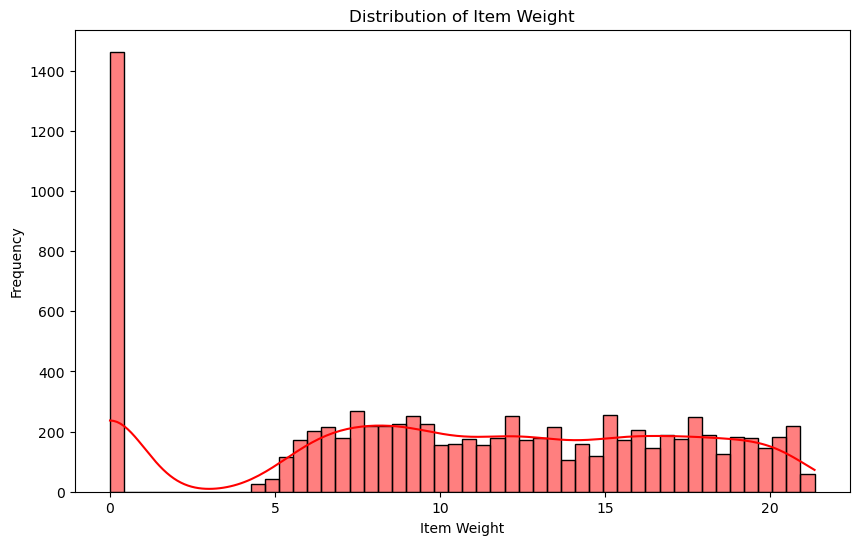

In [182]:
# Distribution of Item Weight
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_Weight'], bins=50, kde=True, color='red')
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

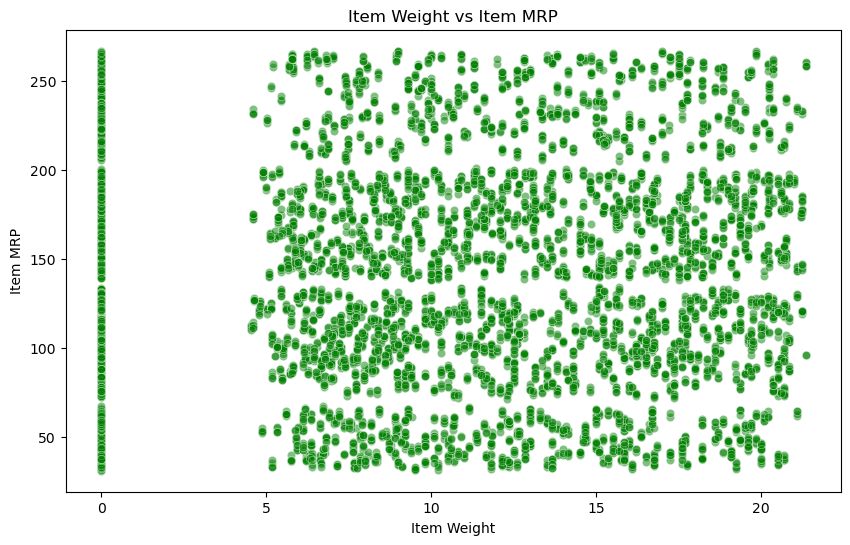

In [183]:
# Scatter Plot of Item Weight vs Item MRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_MRP', data=train_data, alpha=0.5, color='green')
plt.title('Item Weight vs Item MRP')
plt.xlabel('Item Weight')
plt.ylabel('Item MRP')
plt.show()

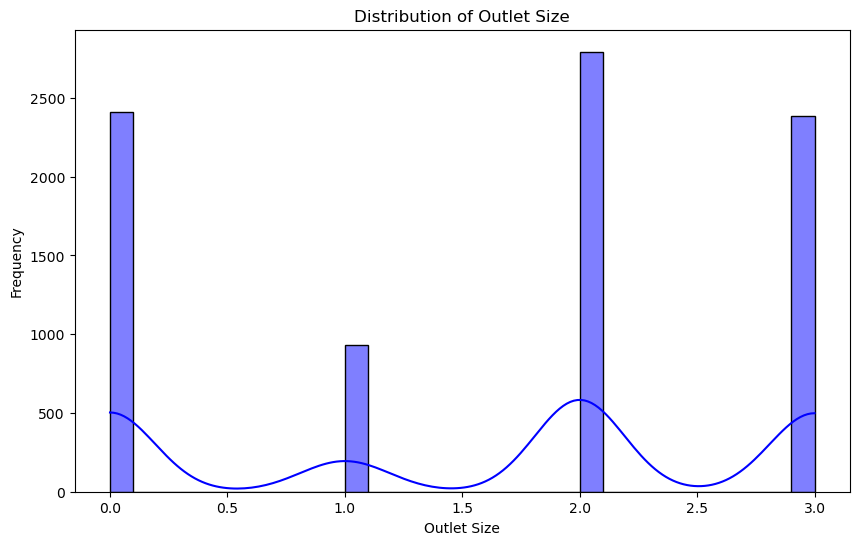

In [184]:
# Distribution of Outlet Size
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Outlet_Size'], bins=30, kde=True, color='blue')
plt.title('Distribution of Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Frequency')
plt.show()

In [37]:
df = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  int64  
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  int64  
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  int64  
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  int64  
 8   Outlet_Location_Type       14204 non-null  int64  
 9   Outlet_Type                14204 non-null  int64  
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 1.2 MB


In [39]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [109]:
df["Item_Outlet_Sales"].fillna(df["Item_Outlet_Sales"].median(), inplace=True)

In [110]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [134]:
X = train_data.drop(columns = 'Item_Outlet_Sales' , axis=1)

y = train_data['Item_Outlet_Sales']

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=2,
                                   min_samples_split=5)
gb_reg.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_split=5,
                          n_estimators=200)

In [138]:
train_score_rf = gb_reg.score(X_train, y_train) * 100
test_score_rf = gb_reg.score(X_test, y_test) * 100

In [139]:
print(f"Gradient Boosting Regressor - Train Accuracy: {train_score_rf:.2f}%")
print(f"Gradient Boosting Regressor - Test Accuracy: {test_score_rf:.2f}%")

Gradient Boosting Regressor - Train Accuracy: 61.29%
Gradient Boosting Regressor - Test Accuracy: 61.48%


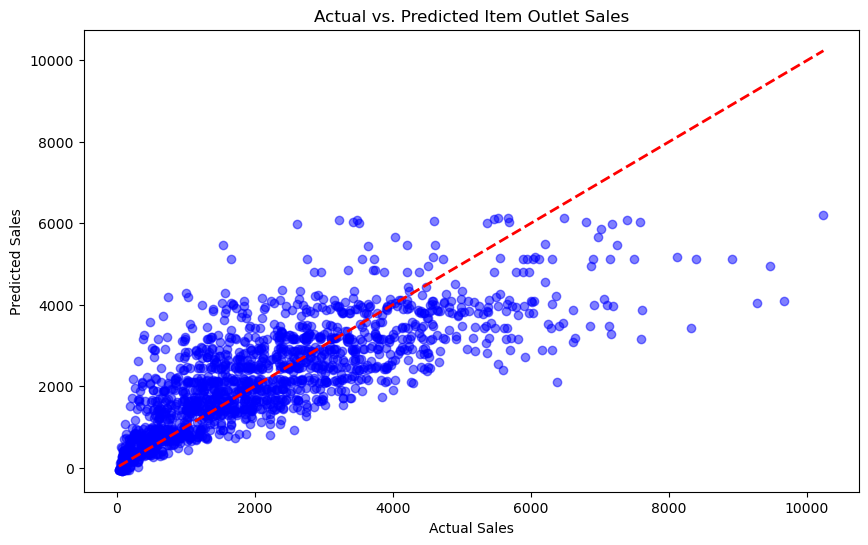

In [188]:
# Make predictions on the test set
y_pred = gb_reg.predict(X_test)


# Create a scatter plot of actual vs. predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Diagonal line
plt.title('Actual vs. Predicted Item Outlet Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [157]:
y_pred = gb_reg.predict([[8.380, 1, 0.046982, 0, 108.1570, 7, 2002, 0, 1, 1]])

In [158]:
predictions_df = pd.DataFrame({"Predicted_Sales": y_pred})

In [159]:
import mysql.connector

# Establish Connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="ml_project"
)
cursor = conn.cursor()

# Create a Table for Predictions (if not exists)
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales_predictions (
        id INT AUTO_INCREMENT PRIMARY KEY,
        predicted_sales FLOAT
    )
""")

# Insert Data into MySQL
for sales in y_pred:
    cursor.execute("INSERT INTO sales_predictions (predicted_sales) VALUES (%s)", (sales,))

# Commit and Close Connection
conn.commit()
conn.close()


Follow Github Account : https://github.com/ZeshanFareed